In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import os
import re
import matplotlib.pyplot as plt
import string
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import en_core_web_sm
from nltk.stem import WordNetLemmatizer
from spellchecker import SpellChecker

nlp = en_core_web_sm.load()

In [2]:
df = pd.read_csv('winemag-data_first150k.csv')

In [3]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
#Files size too big, takes too long to run, hence we shorten the row first
df = df.iloc[1:5000]
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia
...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,US,"This easy-drinking, value-minded wine offers n...",NaN,84,10.0,Washington,Columbia Valley (WA),Columbia Valley,Merlot,Sagelands
4996,4996,Argentina,"Peach and powdered sugar aromas are first up, ...",Serie A,84,15.0,Mendoza Province,Valle de Uco,NaN,Chardonnay-Viognier,Zuccardi
4997,4997,Spain,Simple cherry and plum aromas lead to a modest...,Tempranillo-Garnacha-Syrah,84,9.0,Northern Spain,Cariñena,NaN,Red Blend,Las Valles
4998,4998,US,This 100% varietal wine is lightly aromatic wi...,Lawrence Vineyards,84,14.0,Washington,Columbia Valley (WA),Columbia Valley,Roussanne,Gård


## data preprocessing

C:\Users\allen\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

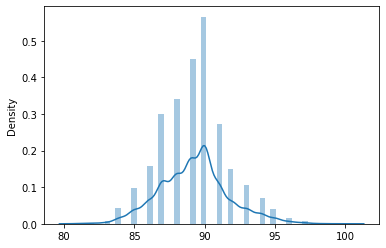

In [5]:
sns.distplot(df,x=df['points'])

C:\Users\allen\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

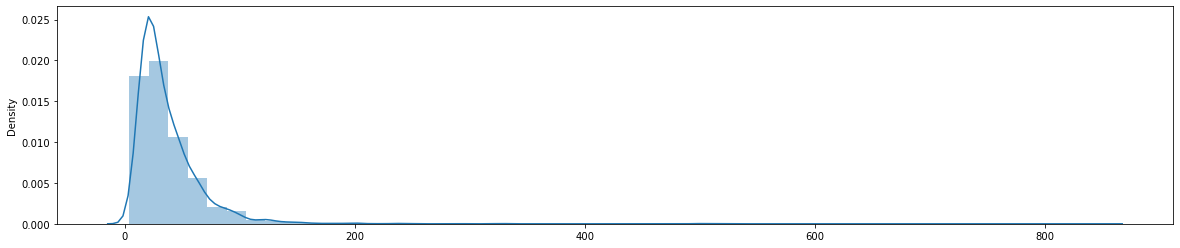

In [6]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(df,x=df['price'],ax=ax)

In [7]:
df['price'].describe()

count    4730.000000
mean       37.281395
std        34.239842
min         4.000000
25%        20.000000
50%        28.000000
75%        45.000000
max       848.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='country'>

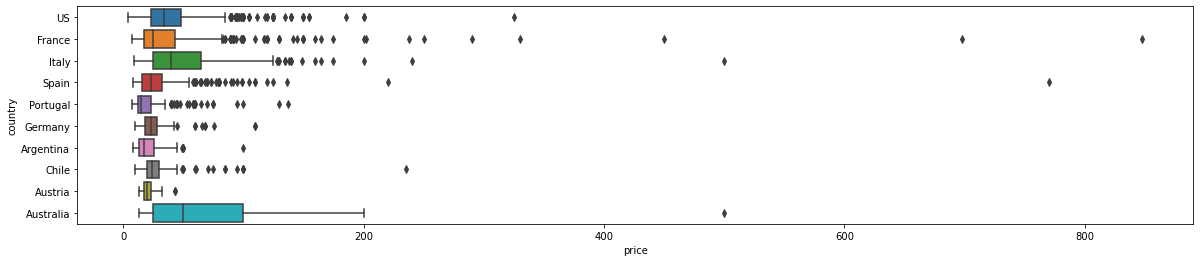

In [8]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="price", y='country',data=df,order=df.country.value_counts().iloc[:10].index,ax=ax)

In [9]:
def cat(x):
    if  x < 85 :
        return "1"
    if x < 90 and x >= 85:
        return "2"
    if x < 95 and x>= 90:
        return "3"
    if x>=95:
        return "4"


df['category'] = df['points'].apply(lambda x: cat(x))

C:\Users\allen\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


<AxesSubplot:xlabel='price', ylabel='category'>

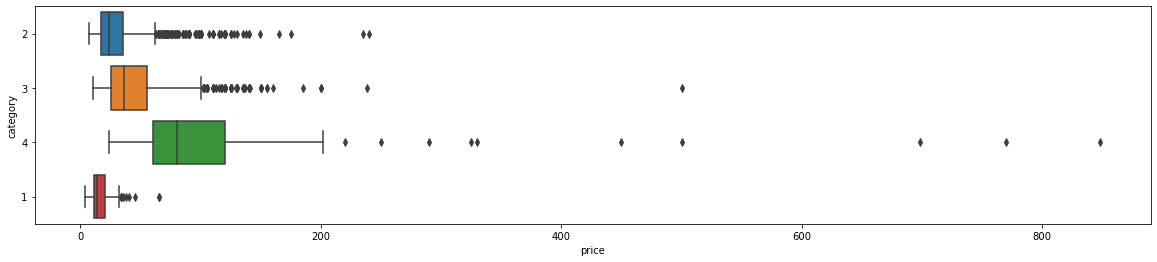

In [10]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="price", y='category',data=df,order=df.category.value_counts().iloc[:10].index,ax=ax)

C:\Users\allen\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

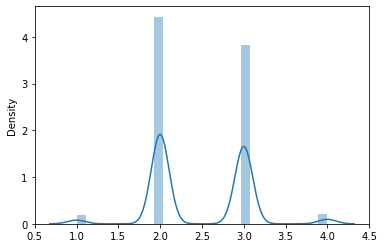

In [11]:
sns.distplot(df,x=df['category'])

In [12]:
words=[]
for i in df['description']:
    new_text=i.split(" ")
    for i in new_text:
        words.append(i)


In [13]:
from nltk import FreqDist

count_words=FreqDist(words)

In [14]:
count_words

FreqDist({'and': 13758, 'of': 6872, 'the': 6618, 'a': 5917, 'with': 4041, 'is': 3460, 'this': 3037, 'in': 2381, 'wine': 2163, 'The': 2153, ...})

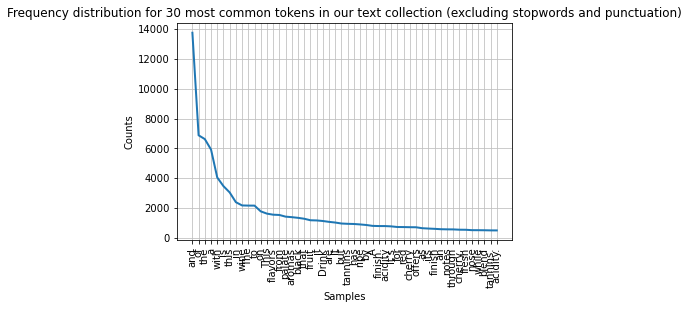

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [15]:
count_words.plot(50,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')

In [16]:
df['description'].describe()

count                                                  4999
unique                                                 4721
top       This luminous Nebbiolo from the mountain viney...
freq                                                      2
Name: description, dtype: object

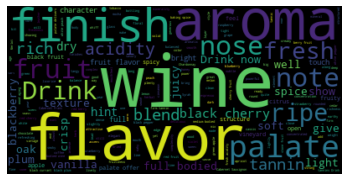

In [17]:
from wordcloud import WordCloud

text = " ".join(review for review in df.description)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [27]:
df_cat1=df[df['category'] == '1']
df_cat2=df[df['category'] == '2']
df_cat3=df[df['category'] == '3']
df_cat4=df[df['category'] == '4']

In [39]:
def plot_common_words(data):
    words=[]
    for i in data['description']:
        new_text=i.split(" ")
        for i in new_text:
            words.append(i)
    count_words=FreqDist(words)
    return count_words.most_common(20)

In [40]:
plot_common_words(df_cat1)

[('and', 203),
 ('a', 111),
 ('of', 93),
 ('the', 92),
 ('with', 74),
 ('is', 65),
 ('This', 47),
 ('this', 47),
 ('wine', 45),
 ('flavors', 40),
 ('to', 37),
 ('are', 32),
 ('on', 30),
 ('aromas', 29),
 ('that', 25),
 ('in', 24),
 ('fruit', 24),
 ('it', 24),
 ('The', 23),
 ('but', 22)]

In [41]:
plot_common_words(df_cat2)

[('and', 6711),
 ('of', 3326),
 ('the', 3090),
 ('a', 2817),
 ('with', 1962),
 ('is', 1533),
 ('this', 1430),
 ('in', 1075),
 ('wine', 1026),
 ('to', 1021),
 ('The', 993),
 ('on', 886),
 ('flavors', 871),
 ('aromas', 828),
 ('This', 798),
 ('palate', 721),
 ('black', 641),
 ('from', 621),
 ('that', 587),
 ('are', 583)]

In [42]:
plot_common_words(df_cat3)

[('and', 6404),
 ('of', 3251),
 ('the', 3200),
 ('a', 2787),
 ('with', 1890),
 ('is', 1672),
 ('this', 1456),
 ('in', 1207),
 ('The', 1050),
 ('to', 1017),
 ('wine', 988),
 ('from', 813),
 ('on', 810),
 ('This', 698),
 ('black', 643),
 ('palate', 638),
 ('that', 599),
 ('flavors', 597),
 ('Drink', 584),
 ('it', 544)]

In [43]:
plot_common_words(df_cat4)

[('and', 440),
 ('the', 236),
 ('of', 202),
 ('a', 202),
 ('is', 190),
 ('with', 115),
 ('wine', 104),
 ('this', 104),
 ('The', 87),
 ('Drink', 83),
 ('to', 76),
 ('in', 75),
 ('from', 74),
 ('This', 70),
 ('that', 59),
 ('it', 51),
 ('its', 47),
 ('tannins', 44),
 ('black', 41),
 ('on', 40)]

<AxesSubplot:xlabel='country', ylabel='count'>

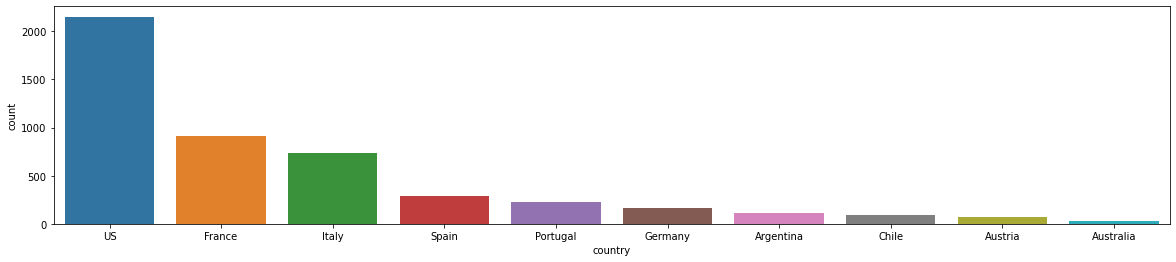

In [18]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="country", data=df,order=df.country.value_counts().iloc[:10].index,ax=ax)

<AxesSubplot:xlabel='variety', ylabel='count'>

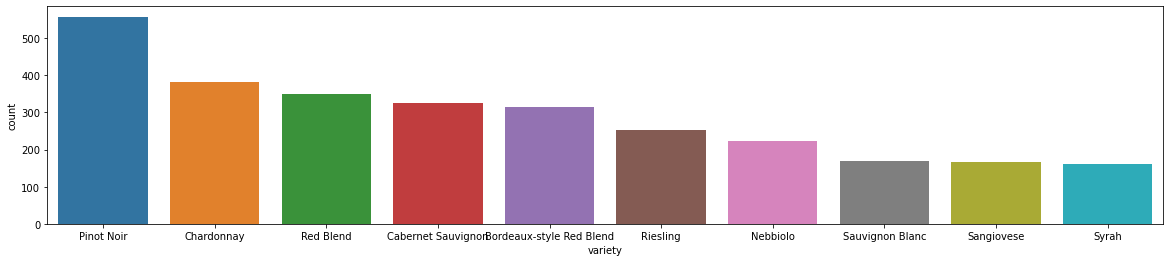

In [19]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="variety", data=df,order=df.variety.value_counts().iloc[:10].index,ax=ax)

In [23]:
# spell checker
spell = SpellChecker()
for i in df['description']:
    #print(i)
    misspelled=spell.unknown(i)
    print(misspelled)

{' '}
{' '}
{' '}
{' ', 'â', 'é'}
{' '}
{' '}
{' '}
{' '}
{'—', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{' '}
{'ö', '”', ' ', '“'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', '–'}
{' '}
{' '}
{' '}
{' '}
{'í', ' '}
{' '}
{'—', ' '}
{' '}
{' ', '–'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', '–'}
{' '}
{' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' ', '–'}
{' ', '–'}
{' '}
{' '}
{' ', '–'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{'—', ' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{'—', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{'è', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'é'}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{'ñ', ' '}
{' '}
{' '}
{'ñ'

{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', '–'}
{' '}
{' ', '–'}
{' '}
{' '}
{' '}
{' ', 'é'}
{' ', '–'}
{' ', '–'}
{' '}
{' '}
{' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{' '}
{'ã', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'â', 'é'}
{' ', '–'}
{' ', '–'}
{' '}
{' '}
{' '}
{'á', ' '}
{' ', '–'}
{' '}
{' '}
{' '}
{'ã', ' '}
{' '}
{'è', ' ', 'é', 'û'}
{' '}
{' '}
{' ', '–'}
{' '}
{' '}
{' '}
{' '}
{' ', 'é', 'à'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{'—', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{'—', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' 

{' '}
{' '}
{' '}
{'ñ', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{'”', ' ', '“'}
{' '}
{' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{' ', '–'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{'è', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'ü'}
{' '}
{' '}
{' ', 'ô'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', '–'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{'ö', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', '–'}
{' ', '–'}
{' '}
{' '}
{' '}
{' ', '–'}
{' '}
{' '}
{' '}
{'—', ' ', '–'}
{' ', '–'}
{' '}
{'—', ' ', '–'}
{' '}
{' ', 'ü'}
{' '}
{' ', '–'}
{' ', '–'}
{' ', '–'}
{' '}
{' '}
{' ', '–'}
{' '}
{' '}
{' '}
{' ',

{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'é'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'é'}
{' '}
{'—', '”', ' ', '“'}
{'—', ' '}
{' ', '–'}
{' ', '–'}
{' ', '–'}
{' ', '–'}
{' ', 'é'}
{' '}
{' '}
{'è', ' '}
{' '}
{' '}
{' ', 'ê', 'é'}
{' ', '–'}
{' '}
{' '}
{' '}
{' ', '–'}
{' '}
{'—', ' '}
{'—', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{'è', ' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'é'}
{' '}
{' ', '–'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' ', 'ü'}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{' '}
{'è', ' '

## sentiment analysis


In [ ]:
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

def cleaner(comment):
    comment = re.sub("@[A-Za-z0-9]+","",comment) #Remove @ sign
    comment = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", comment) #Remove http links
    comment = re.sub(r'[^\w\s]','',comment)
    comment = comment.lower()
    comment = re.sub(r'\d+', '',comment) #remove numbers
    comment = " ".join(comment.split())
    comment = ''.join(c for c in comment if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    comment = comment.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    comment = " ".join(w for w in nltk.wordpunct_tokenize(comment) 
         if w.lower() in words or not w.isalpha())
    return comment
df['processed_description'] = df['description'].map(lambda x: cleaner(x))


In [ ]:
#Lemmatize Words

def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)
df['lemmatised_content'] = df['processed_description'].apply(lambda x: lemmatizer(x))
df['lemmatised_content']=df['lemmatised_content'].str.replace('-PRON-', '')
tokenizer = RegexpTokenizer(r'\w+')

#tokenize the words 

df['stemming_content'] = df['lemmatised_content']

#remove stop words

#def remove_stopwords(text):
#    words = [w for w in text if w not in stopwords.words('english')]
#    custom_words_rm = ['']
#    final_words = [w for w in words if w not in custom_words_rm]
#    return final_words

In [ ]:
df

In [ ]:
# Add our own words
#from nltk.corpus import words
#manywords = words.words()
#new_words = manywords

#remove words with length less than 3 & urls (Can remove if we dont have good explanation about this)
#def remove_shortwords(text, new_words):
#    words = [w for w in text if len(w)>=3]
#   words = [w for w in text if w in new_words]
#    return words

#df1['remove_stopwords_content'] = df1['remove_stopwords_content'].apply(lambda x: remove_stopwords(x))
#df1['remove_stopwords_content'] = df1['remove_stopwords_content'].apply(lambda x: remove_shortwords(x, new_words))
#df1['remove_stopwords_content'].head().values

In [ ]:
#def join(text):
#    sentence = " ".join(text)
#    return sentence
#df1['final_content'] = df1['remove_stopwords_content'].apply(lambda x: join(x))

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

df['final_content'] = df['stemming_content'].apply(stem_sentences)

In [ ]:
df

In [ ]:
#df.to_csv('demo3.csv')

## Do a count frequency for each word (after) to show what is left

In [ ]:
print ("i havent do!")

## Text Analysis using Flair

In [ ]:
import flair
from flair.models import TextClassifier
from segtok.segmenter import split_single
from flair.data import Sentence

def make_sentences(text):
    """ Break apart text into a list of sentences """
    sentences = [sent for sent in split_single(text)]
    return sentences

def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence)
    # stacked_embeddings.embed(text)
    classifier.predict(text)
    value = text.labels[0].to_dict()['value'] 
    if value == 'POSITIVE':
        result = text.to_dict()['labels'][0]['confidence']
    else:
        result = -(text.to_dict()['labels'][0]['confidence'])
    return round(result, 3)

def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = []
    for i in range(0, len(sentences)): 
        results.append(predict(sentences[i]))
    return results

In [ ]:
classifier = TextClassifier.load('en-sentiment')

df['sentences'] = df.final_content.apply(make_sentences)
df['flair_scores'] = df.sentences.apply(get_scores)

In [ ]:
df = df.drop(columns='sentences')

In [ ]:
df

In [ ]:
df['flair_scores'] = [','.join(map(str, l)) for l in df['flair_scores']]
df["flair_scores"] = pd.to_numeric(df["flair_scores"], downcast="float")

In [ ]:
conditions = [
(df['flair_scores'] >= 0.05),
(df['flair_scores'] <= -0.05),
((df['flair_scores'] < 0.05) & (df['flair_scores'] > -0.05))
]

values = ['positive', 'negative', 'neutral']

df['flair_sentiment'] = np.select(conditions, values)

In [ ]:
df

## Vader

In [ ]:
sentiment_analyser = SentimentIntensityAnalyzer()

sentiments_vader = []

for i in df.final_content:
    sentiments_vader.append(sentiment_analyser.polarity_scores(i).get('compound'))
    
sentiments_vader = np.asarray(sentiments_vader)

df['sentiment_vader'] = pd.Series(data=sentiments_vader)
df = df.reset_index(drop=True)

In [ ]:
conditions = [
    (df['sentiment_vader'] >= 0.05),
     (df['sentiment_vader'] <= -0.05),
    ((df['sentiment_vader'] < 0.05) & (df['sentiment_vader'] > -0.05))
    ]

values = ['positive', 'negative', 'neutral']

df['vader'] = np.select(conditions, values)

df.head(10)

## Textblob

In [ ]:
from textblob import TextBlob

sentiments_textblob = []

for review in df.final_content:
    review = TextBlob(review)
    sentiments_textblob.append(review.sentiment.polarity)

sentiments_textblob = np.asarray(sentiments_textblob)   

df['sentiment_textblob'] = pd.Series(data=sentiments_textblob)
df= df.reset_index(drop=True)
df.head()

In [ ]:
conditions = [
    (df['sentiment_textblob'] > 0),
    (df['sentiment_textblob'] < 0),
    (df['sentiment_textblob'] == 0)
    ]

values = ['positive', 'negative', 'neutral']

df['textblob'] = np.select(conditions, values)

df.head(10)

In [ ]:
df['final_sentiment']=''
for data in range(0,len(df)):
    lst1 = []
    flair = df['flair_sentiment'][data]
    vader = df['vader'][data]
    textblob = df['textblob'][data]
    lst1.append(flair)
    if vader in lst1:
        df['final_sentiment'][data] = vader
    else:
        lst1.append(vader)
        if textblob in lst1:
            df['final_sentiment'][data] = textblob
        else:
            df['final_sentiment'][data] = ('unknown')
            

## accuracy counter


In [ ]:
flair_counter = 0
vader_counter = 0
textblob_counter = 0

for data in range(0,len(df)):
    if df['flair_sentiment'][data] == df['final_sentiment'][data]:
        flair_counter = flair_counter + 1
    if df['vader'][data] == df['final_sentiment'][data]:
        vader_counter = vader_counter + 1
    if df['textblob'][data] == df['final_sentiment'][data]:
        textblob_counter = textblob_counter + 1

In [ ]:
print(len(df))

In [ ]:
print(flair_counter)
print(vader_counter)
print(textblob_counter)

In [ ]:
print ("Accuracy for Flair is:", round((flair_counter/len(df))*100,2), "%" )
print ("Accuracy for Vader is:", round((vader_counter/len(df))*100,2), "%" )
print ("Accuracy for Textblob is:", round((textblob_counter/len(df))*100,2), "%" )

## Visualisation of different categories and their sentiment polarity

In [ ]:
df

In [ ]:
#df.to_csv('demo30.csv')

In [ ]:
#df_group1 = df.groupby(['category'])
grouped = df.groupby(df.category)

In [ ]:
df_group1 = grouped.get_group('1')
df_group2 = grouped.get_group('2')
df_group3 = grouped.get_group('3')
df_group4 = grouped.get_group('4')

In [ ]:
df_group1 = df_group1[~df_group1.final_sentiment.str.contains("unknown", na=False)]
df_group2 = df_group2[~df_group2.final_sentiment.str.contains("unknown", na=False)]
df_group3 = df_group3[~df_group3.final_sentiment.str.contains("unknown", na=False)]
df_group4 = df_group4[~df_group4.final_sentiment.str.contains("unknown", na=False)]

In [ ]:
sentiment_grouped_1 = df_group1.groupby(df.final_sentiment)
sentiment_grouped_2 = df_group2.groupby(df.final_sentiment)
sentiment_grouped_3 = df_group3.groupby(df.final_sentiment)
sentiment_grouped_4 = df_group4.groupby(df.final_sentiment)

In [ ]:
df_group1_pos = sentiment_grouped_1.get_group('positive')
df_group1_neg = sentiment_grouped_1.get_group('negative')
df_group2_pos = sentiment_grouped_2.get_group('positive')
df_group2_neg = sentiment_grouped_2.get_group('negative')
df_group3_pos = sentiment_grouped_3.get_group('positive')
df_group3_neg = sentiment_grouped_3.get_group('negative')
df_group4_pos = sentiment_grouped_4.get_group('positive')
df_group4_neg = sentiment_grouped_4.get_group('negative')

## Positive attributes from Group 1

In [ ]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot( counts, x_pos,palette='husl',orient = "h")
    plt.yticks(x_pos, words) 
    plt.ylabel('words')
    plt.xlabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(min_df =1,max_df=3000,stop_words='english')

In [ ]:
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_group1_pos['stemming_content'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)

## Negative attributes from Group 1

In [ ]:
# Fit and transform the processed titles
count_data1 = count_vectorizer.fit_transform(df_group1_neg['stemming_content'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data1, count_vectorizer)

## Positive attributes from Group 2

In [ ]:
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(df_group2_pos['stemming_content'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data2, count_vectorizer)

## Negative attributes from Group 2


In [ ]:
# Fit and transform the processed titles
count_data3 = count_vectorizer.fit_transform(df_group2_neg['stemming_content'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data3, count_vectorizer)

## Positive attributes from Group 3

In [ ]:
# Fit and transform the processed titles
count_data4 = count_vectorizer.fit_transform(df_group3_pos['stemming_content'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data4, count_vectorizer)

## Negative attributes from Group 3


In [ ]:
# Fit and transform the processed titles
count_data5 = count_vectorizer.fit_transform(df_group3_neg['stemming_content'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data5, count_vectorizer)

## Positive attributes from Group 4

In [ ]:
# Fit and transform the processed titles
count_data6 = count_vectorizer.fit_transform(df_group4_pos['stemming_content'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data6, count_vectorizer)

## Negative attributes from Group 4

In [ ]:
# Fit and transform the processed titles
count_data7 = count_vectorizer.fit_transform(df_group4_neg['stemming_content'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data7, count_vectorizer)

## Recommendation for Business Owners

In [ ]:
import numpy as np
result = df.loc[np.logical_and(df['final_sentiment'] == "positive" , df['category'] == '2')]
result = result.loc[np.logical_and(df['country'] == "US" , df['price'] >= 100)]
result

In [ ]:
results = result.drop(columns=['province','variety'])
results = results[~results.final_sentiment.str.contains("unknown", na=False)]
results